<a href="https://colab.research.google.com/github/deogratias99/swot/blob/master/capstone960.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy scikit-learn

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
import pandas as pd

# Load datasets
books = pd.read_csv('/content/sample_data/books.csv', on_bad_lines='skip')

books.drop_duplicates(subset=['bookID'], inplace=True)
books.fillna('', inplace=True)

# Display a preview of the data
#print(books.head())


In [ ]:
books['metadata'] = (
    books['authors'] + ' ' +
    books['language_code'] + ' ' +
    books['text_reviews_count'].astype(str)
)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Vectorize metadata
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(books['metadata'])

# Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Map titles to indices
title_to_index = pd.Series(books.index, index=books['title']).drop_duplicates()

# Recommendation function
def recommend_books(title):
    if title in title_to_index:
        idx = title_to_index[title]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:4]  # Top 3 recommendations
        book_indices = [i[0] for i in sim_scores]
        return books[['title', 'authors', 'average_rating']].iloc[book_indices]
    else:
        return "Book Not Found."

# Example
book_title = input("Enter a book you have read: ")
print(recommend_books(book_title))

In [ ]:
!pip install streamlit
import streamlit as st

# Streamlit dashboard
st.title("Book Recommendation System")
st.write("You Will Get Recommendation You Will Love!")

# User input
book_input = st.text_input("Enter a book you liked:")
if book_input:
    recommendations = recommend_books(book_input)
    st.write("Books you might enjoy:")
    st.dataframe(recommendations)

# Visualize most popular books
st.bar_chart(books['average_rating'].value_counts().head(10))


In [94]:
def precision_at_k(recommended, relevant, k):
    recommended_at_k = recommended[:k]
    return len(set(recommended_at_k) & set(relevant)) / k

In [88]:
import logging

logging.basicConfig(level=logging.INFO)
logging.info("Recommendation system accessed.")

<Axes: xlabel='average_rating'>

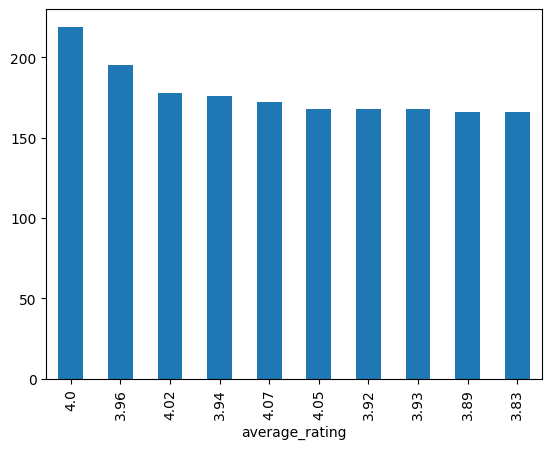

In [95]:
books['average_rating'].value_counts().head(10).plot(kind='bar')


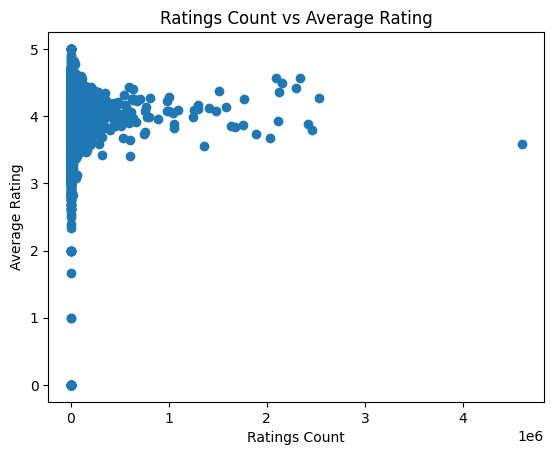

In [96]:
import matplotlib.pyplot as plt

plt.scatter(books['ratings_count'], books['average_rating'])
plt.xlabel('Ratings Count')
plt.ylabel('Average Rating')
plt.title('Ratings Count vs Average Rating')
plt.show()


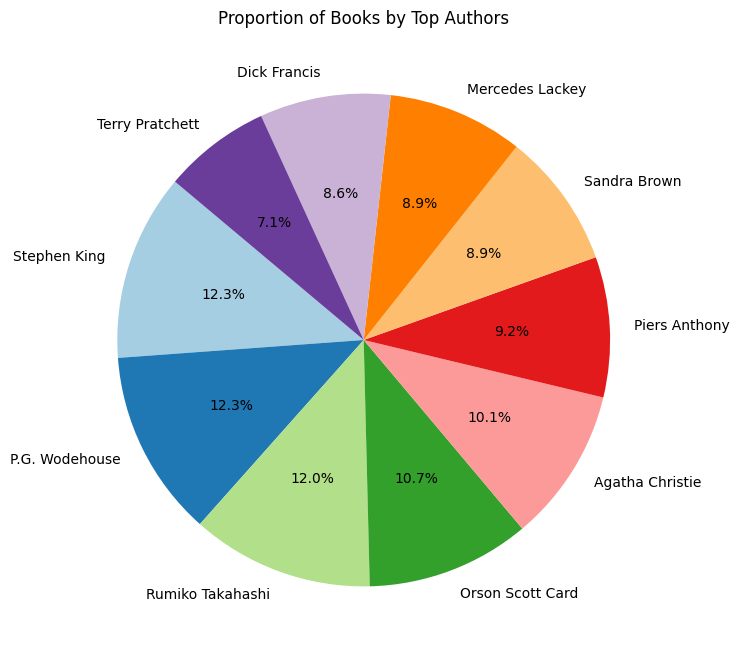

In [97]:
import matplotlib.pyplot as plt

# Count the number of books per author
top_authors = books['authors'].value_counts().head(10)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_authors,
    labels=top_authors.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors,
)
plt.title("Proportion of Books by Top Authors")
plt.show()
